### Read in corpus of data and create list of intervals

In [18]:
from music21 import *
import matplotlib.pyplot as plt
import numpy as np

def patternsearch(seq, pat, indices=None):
    if indices is None:
        indices = np.arange(len(seq))
    found = (seq == pat[0]).nonzero()[0]
    inind = np.in1d(found, indices)
    if len(pat) == 1:
        return found[inind]
    elif np.any(inind):
        return patternsearch(seq, pat[1:], indices=found[inind]+1)
    else:
        return []

In [19]:


composers = ['Bach', 'Beethoven', 'Mozart', 'Corelli', 'Chopin', 'Handel', 'Haydn', 'Palestrina']
composers = ['Bach']
database = corpus.search(composers[0], 'Composer')
for cmp in composers[1:]:
    database = database.union(corpus.search(cmp, 'Composer'))
intrvlist = []
cnt = 0
for thisPiece in database:
    print('{} of {} total pieces'.format(cnt, len(database)))
    thisScore = thisPiece.parse()
    for thisPart in thisScore.parts:
        testNotes = thisPart.flat.getElementsByClass('Note')
        for n1, n2 in zip(testNotes[:-1], testNotes[1:]):
            intrvlist.append(interval.Interval(n1,n2).semitones)

    cnt += 1


# plt.hist(intrvlist, bins=np.arange(-19,21)-.5)
# plt.show()

0 of 362 total pieces
1 of 362 total pieces
2 of 362 total pieces
3 of 362 total pieces
4 of 362 total pieces
5 of 362 total pieces
6 of 362 total pieces
7 of 362 total pieces
8 of 362 total pieces
9 of 362 total pieces
10 of 362 total pieces
11 of 362 total pieces
12 of 362 total pieces
13 of 362 total pieces
14 of 362 total pieces
15 of 362 total pieces
16 of 362 total pieces
17 of 362 total pieces
18 of 362 total pieces
19 of 362 total pieces
20 of 362 total pieces
21 of 362 total pieces
22 of 362 total pieces
23 of 362 total pieces
24 of 362 total pieces
25 of 362 total pieces
26 of 362 total pieces
27 of 362 total pieces
28 of 362 total pieces
29 of 362 total pieces
30 of 362 total pieces
31 of 362 total pieces
32 of 362 total pieces
33 of 362 total pieces
34 of 362 total pieces
35 of 362 total pieces
36 of 362 total pieces
37 of 362 total pieces
38 of 362 total pieces
39 of 362 total pieces
40 of 362 total pieces
41 of 362 total pieces
42 of 362 total pieces
43 of 362 total piece

348 of 362 total pieces
349 of 362 total pieces
350 of 362 total pieces
351 of 362 total pieces
352 of 362 total pieces
353 of 362 total pieces
354 of 362 total pieces
355 of 362 total pieces
356 of 362 total pieces
357 of 362 total pieces
358 of 362 total pieces
359 of 362 total pieces
360 of 362 total pieces
361 of 362 total pieces


### Get counts of biInteral transition probabilities

In [20]:
intrvarray = np.array(intrvlist)
# intrvarray = intrvarray[intrvarray.nonzero()]
possIntervals = np.arange(-12, 13)
counts2D = np.zeros([len(possIntervals), len(possIntervals)])
for intrv1 in possIntervals:
    for intrv2 in possIntervals:
        eop = patternsearch(intrvarray, [intrv1, intrv2])
        counts2D[intrv1-min(possIntervals), intrv2-min(possIntervals)] = len(eop)

### Plot interval counts in 2-dimensional image

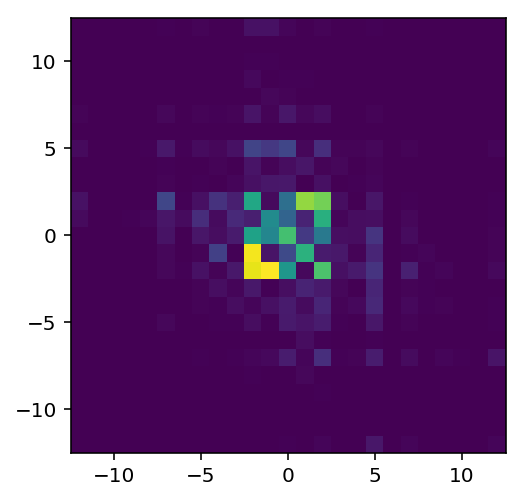

In [39]:
binedges = np.arange(-12, 14) - .5
x,y = np.meshgrid(binedges, binedges)
plt.pcolormesh(x, y, (counts2D))
plt.axis('equal'); plt.axis('square')
plt.show()

## Read in a text file of melody notes and get predictability

### TODO: 
 - Get probability of occurence of a string of notes
 - the shape of the predictions for next note 
 - the transition probability to the actual note

In [42]:
fname = 'all.txt'

lines = [line.rstrip('\n') for line in open(fname)]

melody = lines[0]
melodyList = melody.split(' ')
intrvPtrn = []
for n1, n2 in zip(melodyList[:-1], melodyList[1:]):
    intrvPtrn.append(interval.Interval(note.Note(n1), note.Note(n2)).semitones)
    
    
print(intrvPtrn)

[-2, -4, -1, 3, 3, 4, -2]
